Population finale:
Fiche: 320
Predateur: 100


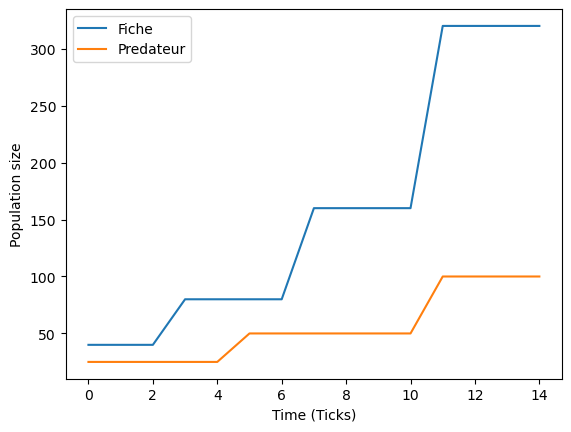

In [3]:
import random

# Define the width and height of the grid
GRID_WIDTH = 10  # largeur de la grille
GRID_HEIGHT = 10  # hauteur de la grille
# Other constants
REPRODUCTION_CHANCE = 0.1  # chance de reproduction pour les poissons (entre 0 et 1)
MAX_AGE = 10  # âge maximal d'un poisson en années
MAX_HUNGER = 3  # niveau de faim maximal d'un prédateur en jours
MIN_OXYGEN = 5 # niveau minimal d'oxygène dissous pour la survie des poissons en mg/L
min_food = 7.2 # minumum de nourriture néssessaire pour un poisson
class Fish:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.food = 0  # quantité de nourriture que le poisson a mangée
        self.age = 0  # âge du poisson

    def move(self, available_food, oxygen_level, temperature):
        if available_food < min_food or oxygen_level < MIN_OXYGEN or temperature < 10 or temperature > 25:  # conditions de survie (condition température de l'eau de 10 à 25°C).
            return
        self.age += 1
        self.food -= 0.1
        new_x = self.x + random.randint(-1, 1)
        new_y = self.y + random.randint(-1, 1)
        if new_x < 0:
            new_x = 0
        elif new_x >= GRID_WIDTH:
            new_x = GRID_WIDTH - 1
        if new_y < 0:
            new_y = 0
        elif new_y >= GRID_HEIGHT:
            new_y = GRID_HEIGHT - 1

        self.x = new_x
        self.y = new_y
        self.food += available_food - min_food  # nourriture restante après mouvement

    def reproduce(self):
        if self.age < 2 or random.random() > REPRODUCTION_CHANCE or self.food < 5:  # conditions de reproduction
            return None
        new_x = self.x + random.randint(-1, 1)
        new_y = self.y + random.randint(-1, 1)
        if new_x < 0:
            new_x = 0
        elif new_x >= GRID_WIDTH:
            new_x = GRID_WIDTH - 1
        if new_y < 0:
            new_y = 0
        elif new_y >= GRID_HEIGHT:
            new_y = GRID_HEIGHT - 1
        new_fish = Fish(new_x, new_y)
        new_fish.food = self.food / 2
        self.food /= 2
        return new_fish

    def die(self):
        if self.age > MAX_AGE or self.food < 0:
            return True
        return False


class Predator:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.hunger = 0  # niveau de faim du prédateur
        self.age = 0  # âge du prédateur

    def move(self, oxygen_level, temperature):
        if oxygen_level < MIN_OXYGEN or temperature < 10 or temperature > 25:  #
            return
        self.age += 1
        self.hunger += 1
        new_x = self.x + random.randint(-1, 1)
        new_y = self.y + random.randint(-1, 1)
        if new_x < 0:
            new_x = 0
        elif new_x >= GRID_WIDTH:
            new_x = GRID_WIDTH - 1
        if new_y < 0:
            new_y = 0
        elif new_y >= GRID_HEIGHT:
            new_y = GRID_HEIGHT - 1

        self.x = new_x
        self.y = new_y

    def eat(self, fish):
        if self.hunger >= MAX_HUNGER or fish is None:  # conditions de repas
            return False
        self.hunger = 0
        self.x = fish.x
        self.y = fish.y
        fish.food = 0
        return True

    def reproduce(self):
        if self.age < 2 or random.random() > REPRODUCTION_CHANCE or self.hunger < 2:  # conditions de reproduction
            return None
        new_x = self.x + random.randint(-1, 1)
        new_y = self.y + random.randint(-1, 1)
        if new_x < 0:
            new_x = 0
        elif new_x >= GRID_WIDTH:
            new_x = GRID_WIDTH - 1
        if new_y < 0:
            new_y = 0
        elif new_y >= GRID_HEIGHT:
            new_y = GRID_HEIGHT - 1
        new_predator = Predator(new_x, new_y)
        new_predator.hunger = self.hunger / 2
        self.hunger /= 2
        return new_predator

    def die(self):
        if self.age > MAX_AGE or self.hunger >= MAX_HUNGER:
            return True
        return False
import matplotlib.pyplot as plt

class Fiche:
    population_size = 40
    tick_counter = 0

    @classmethod
    def reproduce(cls):
        cls.population_size *= 2

    @classmethod
    def die(cls):
        cls.population_size //= 2

class Predateur:
    population_size = 25
    tick_counter = 0

    @classmethod
    def reproduce(cls):
        cls.population_size *= 2

    @classmethod
    def die(cls):
        cls.population_size //= 2

def simulate_ecosystem(nb_ticks):
    fiche_population = []
    predateur_population = []

    for i in range(nb_ticks):
        # Increment the tick counter for each organism
        Fiche.tick_counter += 1
        Predateur.tick_counter += 1

        # Reproduction
        if Fiche.tick_counter >= 4:
            Fiche.reproduce()
            Fiche.tick_counter = 0

        if Predateur.tick_counter >= 6:
            Predateur.reproduce()
            Predateur.tick_counter = 0

        # Death
        if Predateur.population_size >= Fiche.population_size:
            Predateur.die()

        if Fiche.population_size == 0:
            break

        # Update the population lists
        fiche_population.append(Fiche.population_size)
        predateur_population.append(Predateur.population_size)

    # Afficher la population finale
    print("Population finale:")
    print("Fiche:", Fiche.population_size)
    print("Predateur:", Predateur.population_size)

    # Plot the population dynamics over time
    plt.plot(fiche_population, label="Fiche")
    plt.plot(predateur_population, label="Predateur")
    plt.legend()
    plt.xlabel("Time (Ticks)")
    plt.ylabel("Population size")
    plt.show()

simulate_ecosystem(15)
